In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Create a DataFrame with 30-minute intervals from "2023-06-21 15:00:00" to "2024-06-20 20:30:00"
date_range = pd.date_range(start="2023-06-21 15:00:00", end="2024-06-20 20:30:00", freq="30min")
df = pd.DataFrame({"Datetime": date_range, "SpareTheAir": 0.0})

# List of Spare the Air days
spare_the_air_days = [
    "2024-06-17", "2023-09-30", "2023-12-15", "2023-10-19", "2023-09-22",
    "2023-09-21", "2023-09-20", "2023-08-30", "2023-07-21", "2023-07-14"
]
spare_the_air_days = pd.to_datetime(spare_the_air_days)

# Define sigmoid function for smooth transition
def sigmoid(x, x0, k=0.4):
    return 1 / (1 + np.exp(-k * (x - x0)))

# Number of frames (intervals) for the transition
transition_frames = 30

# Apply sigmoid interpolation for each Spare the Air day
for day in spare_the_air_days:
    # Get indices for the day
    day_indices = df[df["Datetime"].dt.normalize() == day].index
    if day_indices.empty:
        continue  # Skip if the day is not in the date range

    day_start = day_indices[0]
    day_end = day_indices[-1]

    # Transition from 0 to 1 in the 30 frames before the event starts
    for i in range(transition_frames):
        frame_index = day_start - transition_frames + i
        if 0 <= frame_index < len(df):
            # i goes from 0 to 29
            df.at[frame_index, "SpareTheAir"] = sigmoid(i, transition_frames / 2)

    # Set SpareTheAir to 1.0 for all intervals during the Spare the Air day
    df.loc[day_start:day_end, "SpareTheAir"] = 1.0

    # Transition from 1 to 0 in the 30 frames after the event ends
    for i in range(transition_frames):
        frame_index = day_end + 1 + i
        if frame_index < len(df):
            # i goes from 0 to 29
            df.at[frame_index, "SpareTheAir"] = sigmoid(transition_frames - i, transition_frames / 2)

# Ensure that SpareTheAir values do not exceed 1.0 or go below 0.0
df["SpareTheAir"] = df["SpareTheAir"].clip(0.0, 1.0)

# Display the DataFrame to check the results
print(df[df["Datetime"].dt.strftime('%Y-%m-%d') == "2024-06-17"].head(100))

                 Datetime  SpareTheAir
17346 2024-06-17 00:00:00          1.0
17347 2024-06-17 00:30:00          1.0
17348 2024-06-17 01:00:00          1.0
17349 2024-06-17 01:30:00          1.0
17350 2024-06-17 02:00:00          1.0
17351 2024-06-17 02:30:00          1.0
17352 2024-06-17 03:00:00          1.0
17353 2024-06-17 03:30:00          1.0
17354 2024-06-17 04:00:00          1.0
17355 2024-06-17 04:30:00          1.0
17356 2024-06-17 05:00:00          1.0
17357 2024-06-17 05:30:00          1.0
17358 2024-06-17 06:00:00          1.0
17359 2024-06-17 06:30:00          1.0
17360 2024-06-17 07:00:00          1.0
17361 2024-06-17 07:30:00          1.0
17362 2024-06-17 08:00:00          1.0
17363 2024-06-17 08:30:00          1.0
17364 2024-06-17 09:00:00          1.0
17365 2024-06-17 09:30:00          1.0
17366 2024-06-17 10:00:00          1.0
17367 2024-06-17 10:30:00          1.0
17368 2024-06-17 11:00:00          1.0
17369 2024-06-17 11:30:00          1.0
17370 2024-06-17 12:00:00

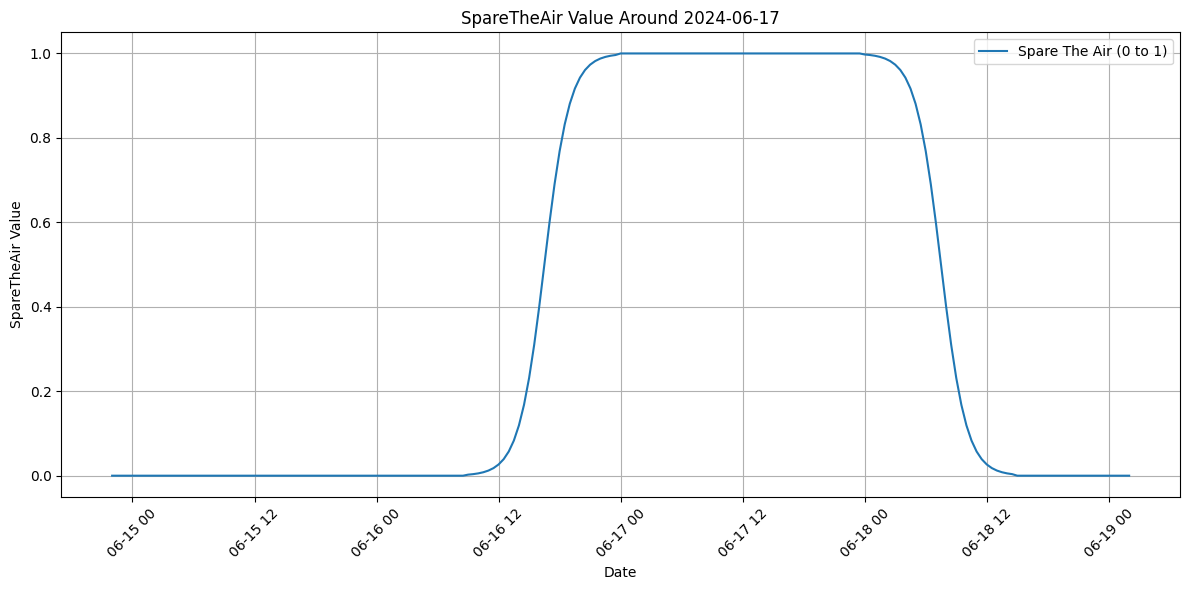

In [7]:

# Date of interest
date_of_interest = "2024-06-17"
rows_before_after = 100

# Find the index for the date of interest
date_index = df[df["Datetime"].dt.normalize() == pd.to_datetime(date_of_interest)].index[0]

# Slice the DataFrame to include 100 rows before and after
start_index = max(date_index - rows_before_after, 0)
end_index = min(date_index + rows_before_after + 1, len(df))
plot_df = df.iloc[start_index:end_index]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(plot_df["Datetime"], plot_df["SpareTheAir"], label="Spare The Air (0 to 1)")
plt.xlabel("Date")
plt.ylabel("SpareTheAir Value")
plt.title(f"SpareTheAir Value Around {date_of_interest}")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Export the DataFrame to CSV
output_path = "../data/spare_the_air_intervals.csv"
df.to_csv(output_path, index=True)

output_path

'../data/spare_the_air_intervals.csv'